# Gaussian
The normal distribution

See 
* Duda/Hart/Stork, Pattern Classification, section 2.5.   
* Penn State University stat[505](https://online.stat.psu.edu/stat505/book/export/html/636) explains that exponent in the multivariate gaussian is a Mahalanobis distance.

## Central Limit Theorem
The normalized sum of data approximates the normal distribution 
for any sufficiently large set of independent random variables, 
regardless of their underlying distributions. 

[Wikipedia](https://en.wikipedia.org/wiki/Central_limit_theorem)

This theorem grew out of the observation that 
the normal distribution is a good approximation of the binomial distribution.

## Univariate Gaussian PDF
$X \sim \mathcal{N} (\mu,\sigma)=(\frac{1}{\sigma \sqrt(2\pi)})e^{[\frac{-1}{2}(\frac{X-\mu}{\sigma})^2]}$  
Random variable X is distributed according to the distribution N
having parameters mean and standard deviation.

Mean is the expected value: $\mu = \sum(x)p(x)$  
Variance is the expected squared deviation: $\sigma^2 = \sum [(x-\mu)(p(x))]^2$  
Mode is $p(\mu) = \frac{1}{\sqrt(2\pi\sigma^2)}$

The normal distribution has maximum entropy (sum of prob * log prob).  
Central limit theorem says aggregate of random disturbance is normal, and aggregate of many random distributions is normal.  
Linear combinations of normal distributions are normal.  

### Implement PDF from scratch

In [1]:
import math
def univariate_gaussian_prob(X,mean,std):
    constant = 1/((std**2)*math.sqrt(2*math.pi))
    deviation = (X-mean)/std
    exponent = (-1/2) * deviation**2
    prob = constant * math.exp(exponent)
    return prob
def show_ugp(X,mean,std):
    print("P(%d|mean=%d,std=%d)=%f"%(X,mean,std,univariate_gaussian_prob(X,mean,std)))

In [2]:
# The probability of X drops as its distance from mean increases
show_ugp(5,5,1)
show_ugp(4,5,1)
show_ugp(6,5,1)
show_ugp(3,5,1)

P(5|mean=5,std=1)=0.398942
P(4|mean=5,std=1)=0.241971
P(6|mean=5,std=1)=0.241971
P(3|mean=5,std=1)=0.053991


In [3]:
# The probability of X=mean drops as the variance increases
show_ugp(5,5,1)
show_ugp(5,5,2)
show_ugp(5,5,3)


P(5|mean=5,std=1)=0.398942
P(5|mean=5,std=2)=0.099736
P(5|mean=5,std=3)=0.044327


### Use numpy univariate
Deprecated: numpy.linalg.norm  

Supported: numpy.random.normal   
Supported: numpy.random.Generator.normal  
Supported: numpy.random.default_rng().normal  

np.normal(mu, sigma, size) # size can be scalar or tuple

Link: [AlphaCodingSkills](https://www.alphacodingskills.com/numpy/numpy-normal-distribution.php)

In [4]:
import scipy as sp
from scipy import stats # pdf and cdf functions
import numpy as np
from numpy.random import normal  # random number generators
import matplotlib.pyplot as plt

In [5]:
data = normal(10,1,5)
data  # 5 random numbers with mean = 10, stdev = 1

array([11.06346701, 10.38442535, 10.07324334,  9.27432829, 11.15752351])

In [6]:
theoretical_mean=10
theoretical_std=1
observations=5000
data = normal(theoretical_mean,theoretical_std,observations)
sample_mean = np.mean(data)
sample_std = np.std(data)
print("Theoretical mean",theoretical_mean,"std",theoretical_std)
print("Observed mean",sample_mean,"std",sample_std)

Theoretical mean 10 std 1
Observed mean 10.00285448361981 std 0.9876232811958866


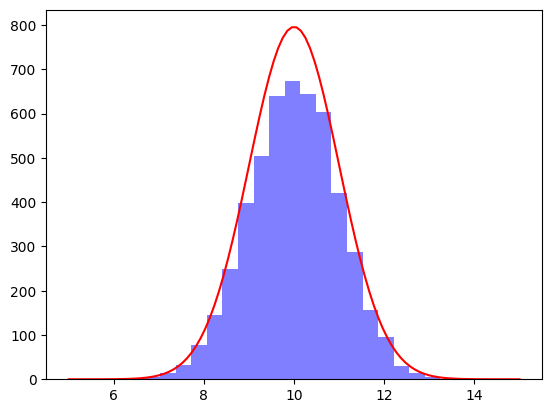

In [7]:
num_bins = 20
x = np.linspace(5,15,100)  # params are Xmin, Xmax, and num points between
max_prob = stats.norm.pdf(theoretical_mean, theoretical_mean, theoretical_std)
max_height = max_prob*observations
plt.plot(x, max_height*stats.norm.pdf(x, theoretical_mean, theoretical_std),color='red')
plt.hist(data, bins=num_bins, facecolor='blue', alpha=0.5)
plt.show()

### Use scipi

In [8]:
# Compute Gaussian probabilities with scipi
from scipy.stats import norm  # one way to do it
from scipy.stats import multivariate_normal  # can be used for univariate too
mean=5; var=1; std=1
print("Mean = %d, variance=%d"%(mean,var))
for x in range(10):
    y = multivariate_normal.pdf(x, mean=mean, cov=var)
    z = norm(mean,std).pdf(x)  # should be same
    print("Prob(%d) = %f = %f"%(x,y,z))

Mean = 5, variance=1
Prob(0) = 0.000001 = 0.000001
Prob(1) = 0.000134 = 0.000134
Prob(2) = 0.004432 = 0.004432
Prob(3) = 0.053991 = 0.053991
Prob(4) = 0.241971 = 0.241971
Prob(5) = 0.398942 = 0.398942
Prob(6) = 0.241971 = 0.241971
Prob(7) = 0.053991 = 0.053991
Prob(8) = 0.004432 = 0.004432
Prob(9) = 0.000134 = 0.000134


## Multivariate Gaussian PDF
Start with univariate.  
$X \sim \mathcal{N} (\mu,\sigma)=(\frac{1}{\sigma \sqrt(2\pi)})e^{[\frac{-1}{2}(\frac{X-\mu}{\sigma})^2]}$  

In the above, X and $\mu$ were scalar with #dimensions D=1.   
Now, rewrite univariate distribution as function of mean and variance.  
Also, make D explicit.  

$X \sim \mathcal{N} (\mu,\sigma^2)=(\frac{1}{\sqrt{\sigma^2} * (2\pi)^{D/2}})e^{[\frac{-1}{2} * \frac{(X-\mu)*(X-\mu)}{\sigma^2}]}$

Next make X and $\mu$ vectors with D>1 dimensions.   
Substitute covariance matrix $\Sigma$ for variance $\sigma^2$.   
Use the determinant under the square root.  
Use the inverse for matrix multiplication.   

$\bar X \sim \mathcal{N} (\bar \mu,\Sigma)=(\frac{1}{\sqrt{|\Sigma|} * (2\pi)^{D/2}})e^{[\frac{-1}{2} * (\bar X - \bar \mu)^{T}*\Sigma^{-1}*(\bar X - \bar \mu)]}$  

If X and Y are independent, $\Sigma$ is a diagonal matrix,
and the multivariate pdf is the product of the univariate pdfs.

If cov is proportional to the identity matrix I, the distribution is spherical.  
Whitening is the transformation that makes this so.  
Otherwise, the data clouds are ellipsoids, and
the eigenvectors of cov are the principal axiis of the ellipsoids.  

Z-scores:   
Just as $(x-\mu)^2 / \sigma$ is the normalized univariate Euclidean distance,  
so $(x-\mu_x)^T\Sigma^{-1}(y-\mu_y) / \sigma$ is the normalized multivariate Mahalanobis distance.

### Use numpy multivariate

In [9]:
# use numpy.random.Generator.multivariate_normal
# to make a multi-dimentional array of random numbers
mean = (1, 2)    # means along two dimensions
cov = [[1, 0], [0, .5]]    # diagonals=variances, off-diagonals=independence
rng = np.random.default_rng()
x = rng.multivariate_normal(mean, cov, (3, 3))  ## make a 3x3 matrix of tuples
x.shape
# Makes more sense to create a list of tuples
x = rng.multivariate_normal(mean, cov, 9)  
# Each of 9 elements is a tuple.
# Each tuple has one number from each dimension. 
x

array([[1.05915436, 1.98735239],
       [1.23134649, 1.93150652],
       [0.87549994, 1.64134423],
       [1.73882959, 2.56446456],
       [0.0359352 , 1.84439764],
       [0.6270816 , 1.57571332],
       [0.77384273, 1.97493822],
       [2.08495089, 3.03813171],
       [1.09370656, 1.48405621]])

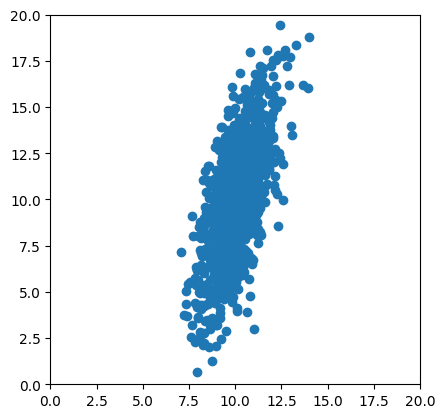

In [10]:
# X-axis: random numbers, mean=10, variance=1, covariance=2
# Y-axis: random numbers, mean=10, variance=10, covariance=2
mean = (10, 10)    # means along two dimensions
cov = [[1, 2], [2, 10]]    # diagonals=variances, off-diagonals=independence
x = rng.multivariate_normal(mean, cov, 1000)  # generate tuples all at once
x1 = [tup[0] for tup in x]   # separate out the tuples for plotting
y1 = [tup[1] for tup in x]
plt.xlim(0, 20)    # Keep X and Y axis same size
plt.ylim(0, 20)
plt.gca().set_aspect('equal', adjustable='box')   # draw square instead of rectangle
plt.scatter(x1, y1)
plt.show()

### Use scipy

In [11]:
from scipy.stats import multivariate_normal  # can be used for univariate too
print("Probability density along center vertical of picture above")
print("Mean = ",mean," variance = ",cov)
for x2 in range(0,20,2):
    x1=10
    y = multivariate_normal.pdf((x1,x2), mean=mean, cov=cov)
    print("Prob at %d,%d = %f "%(x1,x2,y))

Probability density along center vertical of picture above
Mean =  (10, 10)  variance =  [[1, 2], [2, 10]]
Prob at 10,0 = 0.000016 
Prob at 10,2 = 0.000314 
Prob at 10,4 = 0.003235 
Prob at 10,6 = 0.017127 
Prob at 10,8 = 0.046556 
Prob at 10,10 = 0.064975 
Prob at 10,12 = 0.046556 
Prob at 10,14 = 0.017127 
Prob at 10,16 = 0.003235 
Prob at 10,18 = 0.000314 
